In [1]:
path = 'C:/ComputerScience/A_Master_AI_UvA/Year2/Period3-FACT/FACT-Ai/python implementation/secretary/'

In [2]:
import sys
sys.path.insert(0, path)

In [3]:
from secretary_experiments import run_experiments
from collections import Counter
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
run_experiments()

0 K


In [4]:
def count_results(results):

    chosen_colors = [item[1] for item in results]
    max_colors = []
    
    for item in results:
        if item[2]:
            max_colors.append(item[1])

    return Counter(chosen_colors), Counter(max_colors)
    
    # UnbalancedSyntheticExperiment()
    # BankExperiment()
    # InfMaxExperiment()

## Synthetic Experiments

In [5]:
def unfold_experiment(results, experiment):
    
    results_SA, results_SCSA, results_MCSA = results
        
    SA = count_results(results_SA)
    SCSA = count_results(results_SCSA)
    MCSA = count_results(results_MCSA)
    
    print(SA, SCSA, MCSA)
  
    X = ['Input', 'F-Pick', 'F-Max', 'U-Pick','U-Max', 'S-Pick', 'S-Max']

    reds = [10, MCSA[0]['red'], MCSA[1]['red'], SA[0]['red'], SA[1]['red'], SCSA[0]['red'], SCSA[1]['red']]
    greens = [100, MCSA[0]['green'], MCSA[1]['green'], SA[0]['green'], SA[1]['green'], SCSA[0]['green'], SCSA[1]['green']]
    blues = [1000, MCSA[0]['blue'], MCSA[1]['blue'], SA[0]['blue'], SA[1]['blue'], SCSA[0]['blue'], SCSA[1]['blue']]
    yellows = [10000, MCSA[0]['yellow'], MCSA[1]['yellow'], SA[0]['yellow'], SA[1]['yellow'], SCSA[0]['yellow'], SCSA[1]['yellow']]

    X_axis = np.arange(len(X))

    plt.bar(X_axis - 0.4, reds, 0.2, label = 'Color1', color='#b2b2ff', edgecolor = '#b2b2ff')
    plt.bar(X_axis - 0.2, greens, 0.2, label = 'Color2', color='#ffb2b2', edgecolor = '#ffb2b2')
    plt.bar(X_axis + 0, blues, 0.2, label = 'Color3', color='#ecd9c6', edgecolor = '#ecd9c6')
    plt.bar(X_axis + 0.2, yellows, 0.2, label = 'Color4', color='#808080', edgecolor = '#808080')

    plt.xticks(X_axis, X)
    # plt.xlabel("Groups")
    plt.ylabel("Number of Occurances")
    plt.title(experiment)
    plt.legend()
    plt.ylim(top = 12000)
    plt.show()

In [6]:
import pickle

with open(path + 'results_synthetic1.pickle', 'rb') as f:
     results = pickle.load(f)
        
with open(path + 'results_synthetic2.pickle', 'rb') as f:
     results2 = pickle.load(f)

(Counter({'yellow': 190, 'blue': 9, 'red': 1}), Counter({'yellow': 78, 'blue': 1})) (Counter({'blue': 54, 'red': 52, 'green': 47, 'yellow': 47}), Counter({'blue': 19, 'green': 15, 'red': 15, 'yellow': 9})) (Counter({'blue': 57, 'green': 50, 'red': 48, 'yellow': 45}), Counter({'blue': 39, 'green': 34, 'yellow': 32, 'red': 30}))


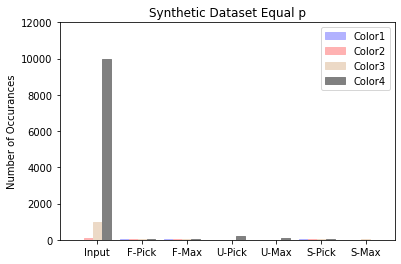

(Counter({'yellow': 17967, 'green': 1357, 'blue': 670, 'red': 6}), Counter({'yellow': 7316, 'green': 1300, 'blue': 4, 'red': 1})) (Counter({'red': 6036, 'green': 5084, 'blue': 4938, 'yellow': 3942}), Counter({'red': 2308, 'green': 1835, 'blue': 1804, 'yellow': 1487})) (Counter({'red': 6921, 'yellow': 5008, 'blue': 4181, 'green': 3890}), Counter({'red': 4709, 'blue': 2967, 'green': 2928, 'yellow': 1686}))


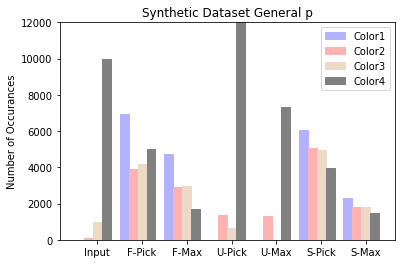

In [7]:
unfold_experiment(results, experiment = "Synthetic Dataset Equal p")
unfold_experiment(results2, experiment = "Synthetic Dataset General p")

## Bank Data

In [8]:
def unfold_bank_experiment(results, n, experiment):
    
    results_SA, results_SCSA, results_MCSA = results
        
    SA = count_results(results_SA)
    SCSA = count_results(results_SCSA)
    MCSA = count_results(results_MCSA)
    
    print(SA, SCSA, MCSA)
  
    X = ['Input', 'F-Pick', 'F-Max', 'U-Pick','U-Max', 'S-Pick', 'S-Max']

    color1 = [n[0], MCSA[0]['under 30'], MCSA[1]['under 30'], SA[0]['under 30'], SA[1]['under 30'], SCSA[0]['under 30'], SCSA[1]['under 30']]
    color2 = [n[1], MCSA[0]['31-40'], MCSA[1]['31-40'], SA[0]['31-40'], SA[1]['31-40'], SCSA[0]['31-40'], SCSA[1]['31-40']]
    color3 = [n[2], MCSA[0]['41-50'], MCSA[1]['41-50'], SA[0]['41-50'], SA[1]['41-50'], SCSA[0]['41-50'], SCSA[1]['41-50']]
    color4 = [n[3], MCSA[0]['51-60'], MCSA[1]['51-60'], SA[0]['51-60'], SA[1]['51-60'], SCSA[0]['51-60'], SCSA[1]['51-60']]
    color5 = [n[4], MCSA[0]['over 60'], MCSA[1]['over 60'], SA[0]['over 60'], SA[1]['over 60'], SCSA[0]['over 60'], SCSA[1]['over 60']]

    X_axis = np.arange(len(X))

    plt.bar(X_axis - 0.3, color1, 0.15, label = 'Under 30', color='#b2b2ff', edgecolor = '#b2b2ff')
    plt.bar(X_axis - 0.15, color2, 0.15, label = '30-40', color='#ffb2b2', edgecolor = '#ffb2b2')
    plt.bar(X_axis + 0, color3, 0.15, label = '40-50', color='#ecd9c6', edgecolor = '#ecd9c6')
    plt.bar(X_axis + 0.15, color4, 0.15, label = '50-60', color='#808080', edgecolor = '#808080')
    plt.bar(X_axis + 0.3, color5, 0.15, label = 'over 60', color='purple', edgecolor = 'purple')

    plt.xticks(X_axis, X)
    # plt.xlabel("Groups")
    plt.ylabel("Number of Occurances")
    plt.title(experiment)
    plt.legend()
    plt.ylim(top = 18000)
    plt.show()

In [9]:
import pickle
with open(path + 'results_bank.pickle', 'rb') as f:
     results3 = pickle.load(f)
        
with open(path + 'results_bank_args.pickle', 'rb') as f:
     n_bank = pickle.load(f)

In [10]:
print(n_bank)

[7030, 17687, 11239, 8067, 1188]


(Counter({'51-60': 11385, '31-40': 3563, '41-50': 3547, 'under 30': 1308, 'over 60': 197}), Counter({'51-60': 7404, '41-50': 1234, '31-40': 643, 'under 30': 97})) (Counter({'51-60': 4109, '41-50': 3986, 'over 60': 3984, '31-40': 3969, 'under 30': 3952}), Counter({'over 60': 1498, '51-60': 1494, '41-50': 1475, 'under 30': 1458, '31-40': 1407})) (Counter({'31-40': 4579, '41-50': 4108, 'under 30': 3912, '51-60': 3905, 'over 60': 3496}), Counter({'31-40': 2730, '51-60': 2672, '41-50': 2671, 'under 30': 2645, 'over 60': 2619}))


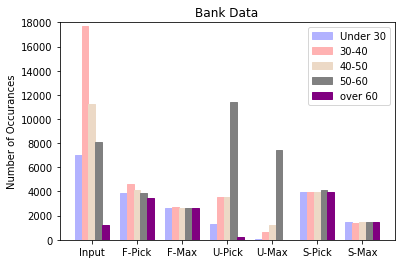

In [11]:
unfold_bank_experiment(results3, n_bank, experiment = "Bank Data")

## Pokec Data

In [12]:
def unfold_pokec_experiment(results, n, experiment):
    
    results_SA, results_SCSA, results_MCSA = results
        
    SA = count_results(results_SA)
    SCSA = count_results(results_SCSA)
    MCSA = count_results(results_MCSA)
    
    print(SA, SCSA, MCSA)
  
    X = ['Input', 'F-Pick', 'F-Max', 'U-Pick','U-Max', 'S-Pick', 'S-Max']

    color1 = [n[0], MCSA[0]['Under'], MCSA[1]['Under'], SA[0]['Under'], SA[1]['Under'], SCSA[0]['Under'], SCSA[1]['Under']]
    color2 = [n[1], MCSA[0]['Normal'], MCSA[1]['Normal'], SA[0]['Normal'], SA[1]['Normal'], SCSA[0]['Normal'], SCSA[1]['Normal']]
    color3 = [n[2], MCSA[0]['Over'], MCSA[1]['Over'], SA[0]['Over'], SA[1]['Over'], SCSA[0]['Over'], SCSA[1]['Over']]
    color4 = [n[3], MCSA[0]['Obese 1'], MCSA[1]['Obese 1'], SA[0]['Obese 1'], SA[1]['Obese 1'], SCSA[0]['Obese 1'], SCSA[1]['Obese 1']]
    color5 = [n[4], MCSA[0]['Obese 2'], MCSA[1]['Obese 2'], SA[0]['Obese 2'], SA[1]['Obese 2'], SCSA[0]['Obese 2'], SCSA[1]['Obese 2']]

    X_axis = np.arange(len(X))

    plt.bar(X_axis - 0.3, color1, 0.15, label = 'Under', color='#b2b2ff', edgecolor = '#b2b2ff')
    plt.bar(X_axis - 0.15, color2, 0.15, label = 'Normal', color='#ffb2b2', edgecolor = '#ffb2b2')
    plt.bar(X_axis + 0, color3, 0.15, label = 'Over', color='#ecd9c6', edgecolor = '#ecd9c6')
    plt.bar(X_axis + 0.15, color4, 0.15, label = 'Obese 1', color='#808080', edgecolor = '#808080')
    plt.bar(X_axis + 0.3, color5, 0.15, label = 'Obese 2', color='purple', edgecolor = 'purple')

    plt.xticks(X_axis, X)
    # plt.xlabel("Groups")
    plt.ylabel("Number of Occurances")
    plt.title(experiment)
    plt.legend()
    plt.ylim(top = 18000)
    plt.show()

In [13]:
import pickle
with open(path + 'results_pokec.pickle', 'rb') as f:
     results4 = pickle.load(f)
        
with open(path + 'results_pokec_args.pickle', 'rb') as f:
     n_pokec = pickle.load(f)

(Counter({'Normal': 17, 'Under': 2, 'Over': 1}), Counter({'Normal': 9})) (Counter({'Obese 1': 7, 'Normal': 5, 'Obese 2': 5, 'Under': 3}), Counter({'Normal': 2, 'Obese 2': 1, 'Under': 1, 'Obese 1': 1})) (Counter({'Over': 6, 'Normal': 5, 'Obese 1': 4, 'Obese 2': 3, 'Under': 2}), Counter({'Normal': 4, 'Over': 3, 'Obese 2': 2, 'Obese 1': 2}))


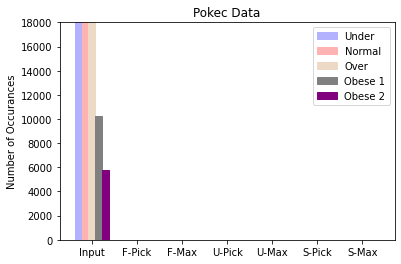

In [14]:
unfold_pokec_experiment(results4, n_pokec, experiment = "Pokec Data")

## C++ Experiments

### Synthetic Data

In [15]:
def unfold_experiment(results, experiment):
    
    SA, SCSA, MCSA = results
  
    X = ['Input', 'F-Pick', 'F-Max', 'U-Pick','U-Max', 'S-Pick', 'S-Max']

    reds = [10, MCSA[0][0], MCSA[1][0], SA[0][0], SA[1][0], SCSA[0][0], SCSA[1][0]]
    greens = [100, MCSA[0][1], MCSA[1][1], SA[0][1], SA[1][1], SCSA[0][1], SCSA[1][1]]
    blues = [1000, MCSA[0][2], MCSA[1][2], SA[0][2], SA[1][2], SCSA[0][2], SCSA[1][2]]
    yellows = [10000, MCSA[0][3], MCSA[1][3], SA[0][3], SA[1][3], SCSA[0][3], SCSA[1][3]]

    X_axis = np.arange(len(X))

    plt.bar(X_axis - 0.4, reds, 0.2, label = 'Color1', color='#b2b2ff', edgecolor = '#b2b2ff')
    plt.bar(X_axis - 0.2, greens, 0.2, label = 'Color2', color='#ffb2b2', edgecolor = '#ffb2b2')
    plt.bar(X_axis + 0, blues, 0.2, label = 'Color3', color='#ecd9c6', edgecolor = '#ecd9c6')
    plt.bar(X_axis + 0.2, yellows, 0.2, label = 'Color4', color='#808080', edgecolor = '#808080')

    plt.xticks(X_axis, X)
    # plt.xlabel("Groups")
    plt.ylabel("Number of Occurances")
    plt.title(experiment)
    plt.legend()
    plt.ylim(top = 12000)
    plt.show()

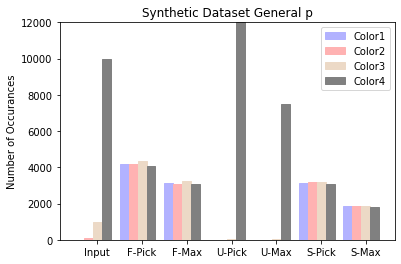

In [16]:
SA = [[0, 0, 1, 12737], [0, 0, 1, 7305]]
SCSA = [[3250, 3146, 3176, 3180], [1896, 1836, 1881, 1835]]
MCSA = [[4205, 4268, 4262, 4217], [3161, 3184, 3196, 3118]]


SA = [[0, 0, 28, 12527], [0, 0, 27, 7482]]
SCSA = [[3146, 3205, 3197, 3095], [1843, 1845, 1875, 1833]]
MCSA = [[4198, 4184, 4358, 4088], [3131, 3062, 3230, 3066]]

results = (SA, SCSA, MCSA)
unfold_experiment(results, experiment = "Synthetic Dataset General p")

### Synthetic Data2

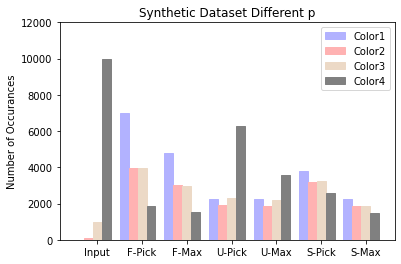

In [17]:
SA = [[2233, 1897, 2326, 6293], [2232, 1887, 2187, 3579]]
SCSA = [[3793, 3192, 3244, 2564], [2255, 1892, 1880, 1506]]
MCSA = [[7007, 3947, 3935, 1859], [4784, 3009, 2951, 1544]]

results = (SA, SCSA, MCSA)
unfold_experiment(results, experiment = "Synthetic Dataset Different p")

### Bank Data

In [18]:
def unfold_bank_experiment(results, n, experiment):
    
    SA, SCSA, MCSA = results
    
    print(SA, SCSA, MCSA)
  
    X = ['Input', 'F-Pick', 'F-Max', 'U-Pick','U-Max', 'S-Pick', 'S-Max']
    
    color1 = [n[0], MCSA[0][0], MCSA[1][0], SA[0][0], SA[1][0], SCSA[0][0], SCSA[1][0]]
    color2 = [n[1], MCSA[0][1], MCSA[1][1], SA[0][1], SA[1][1], SCSA[0][1], SCSA[1][1]]
    color3 = [n[2], MCSA[0][2], MCSA[1][2], SA[0][2], SA[1][2], SCSA[0][2], SCSA[1][2]]
    color4 = [n[3], MCSA[0][3], MCSA[1][3], SA[0][3], SA[1][3], SCSA[0][3], SCSA[1][3]]
    color5 = [n[4], MCSA[0][4], MCSA[1][4], SA[0][4], SA[1][4], SCSA[0][4], SCSA[1][4]]

    X_axis = np.arange(len(X))

    plt.bar(X_axis - 0.3, color1, 0.15, label = 'Under 30', color='#b2b2ff', edgecolor = '#b2b2ff')
    plt.bar(X_axis - 0.15, color2, 0.15, label = '30-40', color='#ffb2b2', edgecolor = '#ffb2b2')
    plt.bar(X_axis + 0, color3, 0.15, label = '40-50', color='#ecd9c6', edgecolor = '#ecd9c6')
    plt.bar(X_axis + 0.15, color4, 0.15, label = '50-60', color='#808080', edgecolor = '#808080')
    plt.bar(X_axis + 0.3, color5, 0.15, label = 'over 60', color='purple', edgecolor = 'purple')

    plt.xticks(X_axis, X)
    # plt.xlabel("Groups")
    plt.ylabel("Number of Occurances")
    plt.title(experiment)
    plt.legend()
    plt.ylim(top = 18000)
    plt.show()

[[130, 654, 1755, 10141, 0], [103, 602, 1256, 7378, 0]] [[2546, 2496, 2480, 2522, 2566], [1532, 1483, 1452, 1505, 1492]] [[3501, 3514, 3334, 3443, 3495], [2723, 2700, 2559, 2643, 2712]]


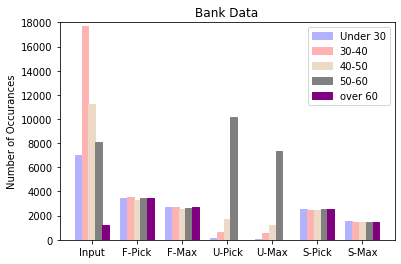

In [19]:
SA = [[130, 654, 1755, 10141, 0], [103, 602, 1256, 7378, 0]]
SCSA = [[2546, 2496, 2480, 2522, 2566], [1532, 1483, 1452, 1505, 1492]]
MCSA = [[3501, 3514, 3334, 3443, 3495], [2723, 2700, 2559, 2643, 2712]]
n = [7030, 17687, 11239, 8067, 1188] 

results = (SA, SCSA, MCSA)
unfold_bank_experiment(results, n, experiment = "Bank Data")